<a href="https://colab.research.google.com/github/Tannee-Siddique/Breast-cancer-Regression/blob/main/breast_cancer_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Tannee-Siddique/Breast-cancer-Regression.git
%cd Breast-cancer-Regression

fatal: destination path 'Breast-cancer-Regression' already exists and is not an empty directory.
/content/Breast-cancer-Regression


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target

df.to_csv("breast_cancer_data.csv", index=False)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


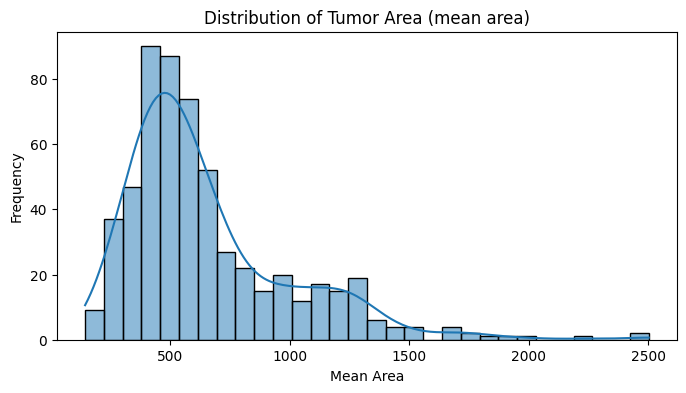

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(df['mean area'], bins=30, kde=True)
plt.title("Distribution of Tumor Area (mean area)")
plt.xlabel("Mean Area")
plt.ylabel("Frequency")
plt.show()


The right skewed distributuion of the tumor area shows that most tumors lies between ~ 400 - 800, whereas few tumors have larger area.

**NOTE:** Skewed data might affect the regression assumption. If considered a linear regression, **log transformation** might be a good choice as it stabilizes the variance.

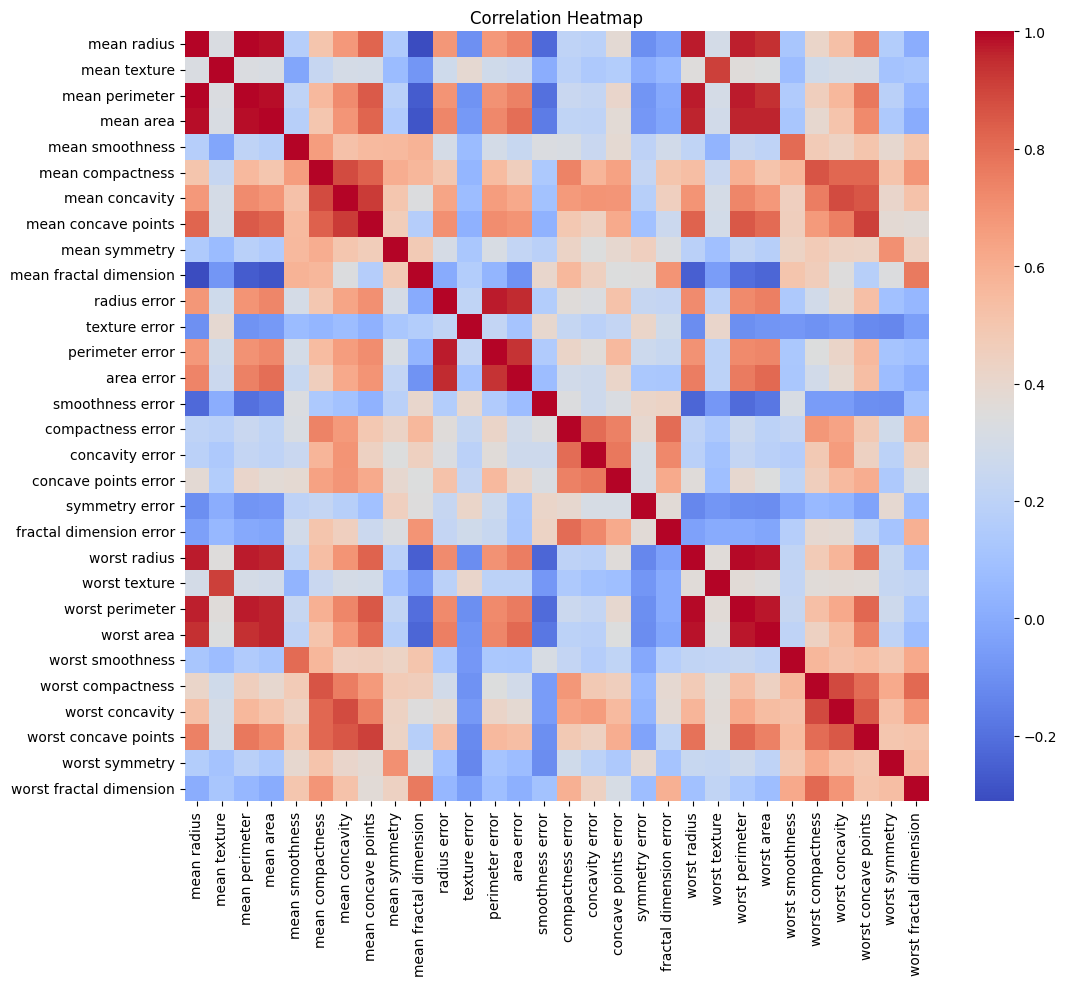

In [7]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Mean area is highly correlated with mean radius, mean perimeter, worst radius, worst perimeter, worst area indicating strong linear relatiohship.

**NOTE:** High correlation means these variables are powerful predictors of tumor size, but also raises potential **multicollinearity issues** if we include all of them in linear regression.

In [8]:
corr_target = corr['mean area'].drop('mean area').sort_values(ascending=False)
print(corr_target.head(10))


mean radius             0.987357
mean perimeter          0.986507
worst radius            0.962746
worst area              0.959213
worst perimeter         0.959120
mean concave points     0.823269
area error              0.800086
radius error            0.732562
perimeter error         0.726628
worst concave points    0.722017
Name: mean area, dtype: float64


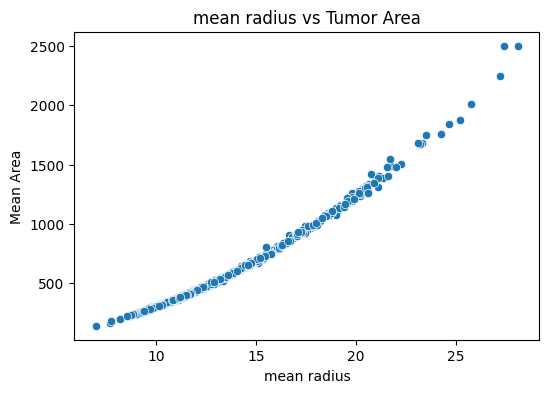

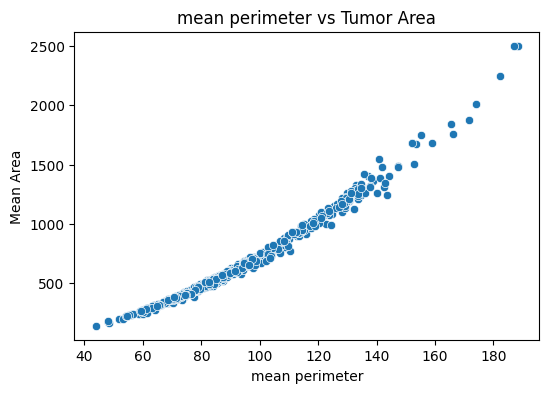

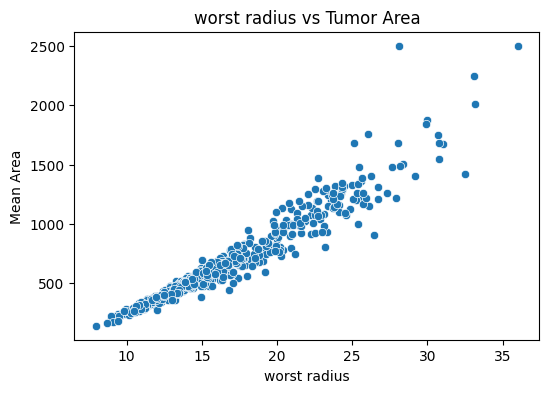

In [9]:
top_features = corr_target.head(3).index

for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='mean area')
    plt.title(f"{feature} vs Tumor Area")
    plt.xlabel(feature)
    plt.ylabel("Mean Area")
    plt.show()


**mean radius vs tumor area plot:** almost quaradic (area = pi * r^2). Radius can have a direct influence on the tumor area.

**mean perimeter vs tumor area:** has strong positive non-linear relationship.\
**NOTE:** this might be a key predictor but may be redundant with mean area.

**worst radius vs tumor area:** the tumor area has stong correlation with worst radius but is more spread out than the mean radius.\  
**NOTE:** might be helpful in capturing size extremes in a patient’s tumor morphology.

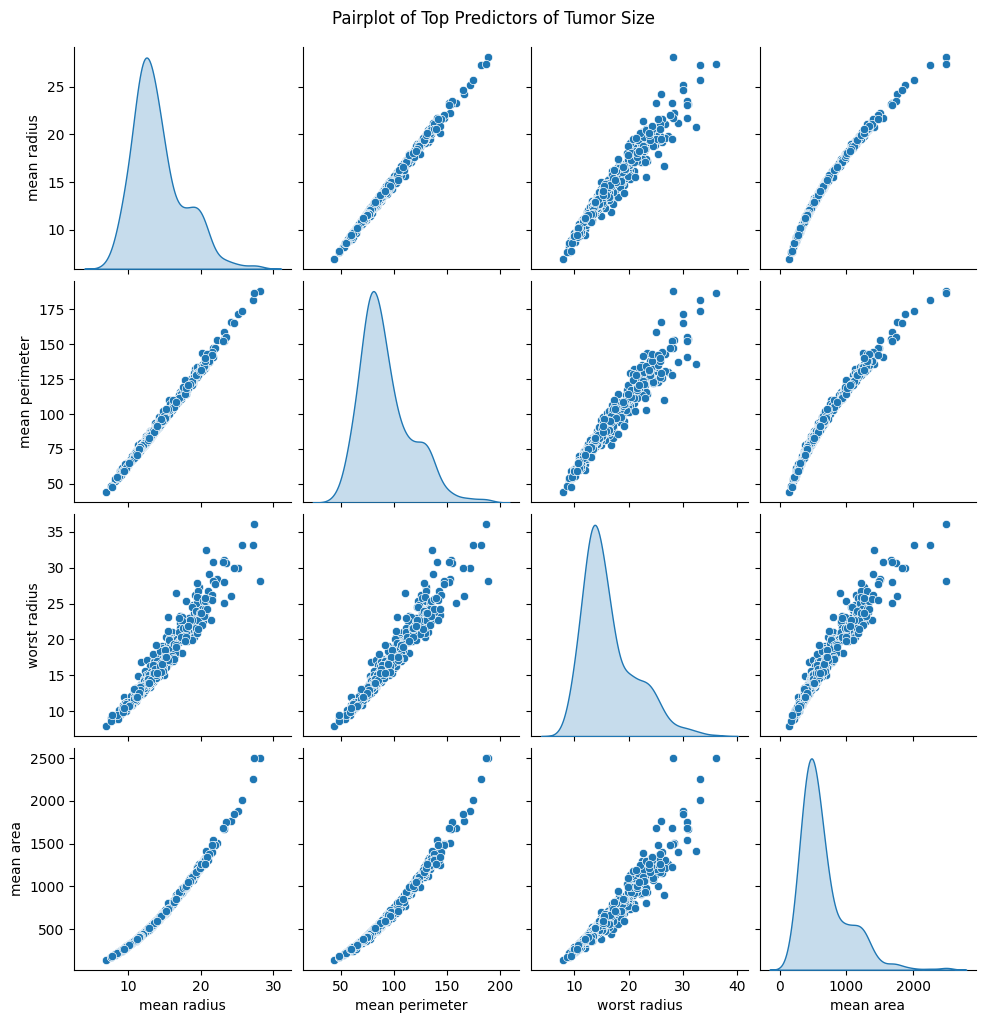

In [10]:
sns.pairplot(df, vars=top_features.tolist() + ['mean area'], diag_kind='kde')
plt.suptitle("Pairplot of Top Predictors of Tumor Size", y=1.02)
plt.show()


All predictor-predictor relationships are highly linear, indicating strong multicollinearity.\
For linear regression, might need to reduce features to avoid multicollinearity issues.

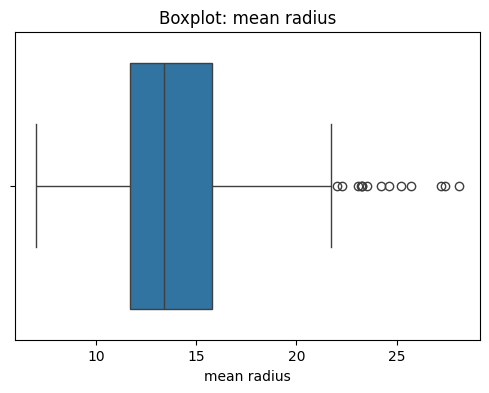

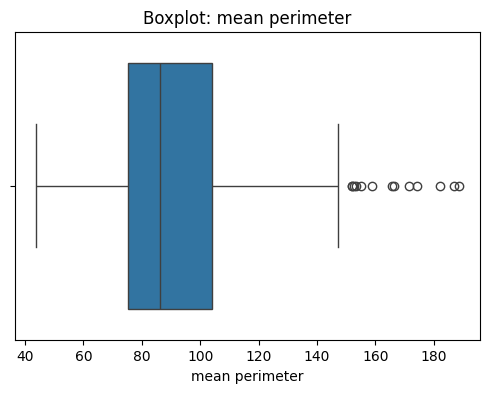

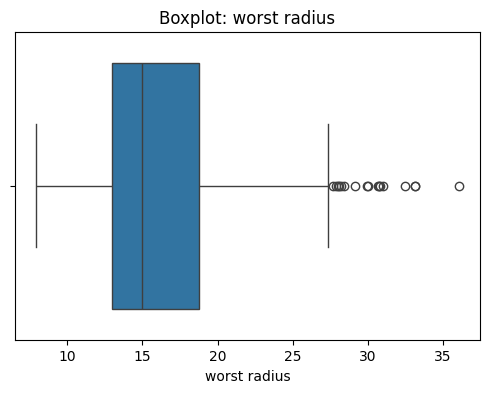

In [11]:
for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot: {feature}")
    plt.show()


**Mean Radius:**
A few outliers on the high end\
**NOTE:** Outliers can disproportionately influence regression models.

**Mean Perimeter:**
Few high outliers.\
**NOTE:** Confirms skewness and the need for robust regression or transformations.

**Worst Radius:**
More outliers than mean radius. Some tumors might have extreme size variations.\
**NOTE:** Might need to handle these in preprocessing.

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[top_features.tolist()]
X = add_constant(X)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns
print(vif)


          VIF         Feature
0   30.921778           const
1  237.612964     mean radius
2  237.133118  mean perimeter
3   16.936256    worst radius


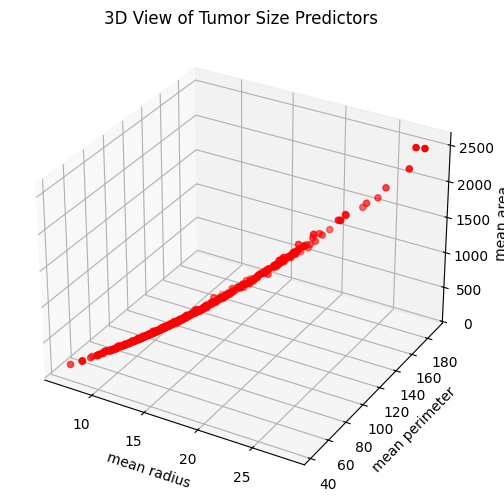

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[top_features[0]], df[top_features[1]], df['mean area'], c='r', marker='o')
ax.set_xlabel(top_features[0])
ax.set_ylabel(top_features[1])
ax.set_zlabel('mean area')
plt.title("3D View of Tumor Size Predictors")
plt.show()


📌 **Key Takeaways for Modeling**

**Best Predictors**: mean radius, mean perimeter, and worst radius have the highest correlation with mean area.

**Potential Multicollinearity:** These predictors are highly correlated with each other — may need to use one or apply dimensionality reduction (PCA).

**Outliers Present:** Large tumors appear as outliers — robust regression or transformation might be needed.

**Non-linear Relationship:** Relationships are not perfectly linear — polynomial terms or tree-based models may perform better than plain linear regression.

###**Set-up Model**

In [14]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

In [15]:
target_col = 'mean area'
y = df[target_col]
X = df.drop(columns=[target_col])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [16]:
lin_reg = LinearRegression()
ridge_reg = Ridge()
ridge_alpha = Ridge(alpha=1.0)
lasso_reg = Lasso()
lasso_alpha = Lasso(alpha=0.01)
rf_reg = RandomForestRegressor()
rf = RandomForestRegressor(n_estimators=200, random_state=42)

###**Pre-processing**

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def preprocess_training_set(X_train, y_train, scale_features=True):
    """
    Preprocess the training set for tumor size prediction.

    Returns:
        X_train_processed, y_train_processed, scaler (if scaling used)
    """

    # Handle outliers for key features
    def clip_outliers(series, factor=1.5):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        return series.clip(lower, upper)

    for col in ['mean_radius', 'mean_perimeter', 'worst_radius']:
        if col in X_train.columns:
            X_train[col] = clip_outliers(X_train[col])

    # Feature scaling (fit only on training data)
    scaler = None
    if scale_features:
        scaler = StandardScaler()
        X_train = pd.DataFrame(
            scaler.fit_transform(X_train),
            columns=X_train.columns,
            index=X_train.index
        )

    return X_train, y_train, scaler


In [18]:
fold_num = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Preprocess ONLY the training set
    X_train_processed, y_train_processed, scaler = preprocess_training_set(X_train, y_train, scale_features=True)

    # Apply same scaling to test set
    if scaler:
        X_test = pd.DataFrame(
            scaler.transform(X_test),
            columns=X_test.columns,
            index=X_test.index
        )

    print(f"Fold {fold_num} - Train shape: {X_train_processed.shape}, Test shape: {X_test.shape}")
    fold_num += 1

Fold 1 - Train shape: (455, 29), Test shape: (114, 29)
Fold 2 - Train shape: (455, 29), Test shape: (114, 29)
Fold 3 - Train shape: (455, 29), Test shape: (114, 29)
Fold 4 - Train shape: (455, 29), Test shape: (114, 29)
Fold 5 - Train shape: (456, 29), Test shape: (113, 29)


### **Model Training**

In [19]:
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
ridge_alpha.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
lasso_alpha.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+04, tolerance: 5.248e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.872e+04, tolerance: 5.248e+03
  model = cd_fast.enet_coordinate_descent(


RandomForestRegressor(n_estimators=200, random_state=42)

###**Prediction**

In [20]:
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
# y_pred_ridge_alpha = ridge_alpha.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_lasso_alpha = lasso_alpha.predict(X_test)
y_pred_rf_reg = rf_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

### **Compare Models**

In [21]:
results = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso', 'Lasso (alpha=0.01)', 'RandomForest', 'RandomForest (n_estimators=200)'],
    'MSE': [
        mean_squared_error(y_test, y_pred_lin),
        mean_squared_error(y_test, y_pred_ridge),
        # mean_squared_error(y_test, y_pred_ridge_alpha),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_lasso_alpha),
        mean_squared_error(y_test, y_pred_rf_reg),
        mean_squared_error(y_test, y_pred_rf)
    ],
    'R²': [
        r2_score(y_test, y_pred_lin),
        r2_score(y_test, y_pred_ridge),
        # r2_score(y_test, y_pred_ridge_alpha),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_lasso_alpha),
        r2_score(y_test, y_pred_rf_reg),
        r2_score(y_test, y_pred_rf)
    ]
})

print(results)

                             Model           MSE          R²
0                           Linear  1.797962e+07 -113.394446
1                            Ridge  9.172480e+05   -4.835944
2                            Lasso  1.007113e+06   -5.407707
3               Lasso (alpha=0.01)  1.314826e+06   -7.365517
4                     RandomForest  4.175221e+05   -1.656463
5  RandomForest (n_estimators=200)  4.197753e+05   -1.670799


### Log transform

In [22]:
fold_num = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Preprocess ONLY the training set
    X_train_processed, y_train_processed, scaler = preprocess_training_set(X_train, y_train, scale_features=True)

    # Recompute log1p of the processed y_train
    y_log = np.log1p(y_train_processed)


    # Apply same scaling to test set
    if scaler:
        X_test = pd.DataFrame(
            scaler.transform(X_test),
            columns=X_test.columns,
            index=X_test.index
        )

    print(f"Fold {fold_num} - Train shape: {X_train_processed.shape}, Test shape: {X_test.shape}")
    fold_num += 1

Fold 1 - Train shape: (455, 29), Test shape: (114, 29)
Fold 2 - Train shape: (455, 29), Test shape: (114, 29)
Fold 3 - Train shape: (455, 29), Test shape: (114, 29)
Fold 4 - Train shape: (455, 29), Test shape: (114, 29)
Fold 5 - Train shape: (456, 29), Test shape: (113, 29)


In [23]:
# Train model on y_log instead of y
lin_reg.fit(X_train, y_log)
ridge_reg.fit(X_train, y_log)
# ridge_alpha.fit(X_train, y_log)
lasso_reg.fit(X_train, y_log)
lasso_alpha.fit(X_train, y_log)
rf_reg.fit(X_train, y_log)
rf.fit(X_train, y_log)


RandomForestRegressor(n_estimators=200, random_state=42)

In [24]:
# Predictions back to original scale
y_predlog_lin = np.expm1(lin_reg.predict(X_test))
y_predlog_ridge = np.expm1(ridge_reg.predict(X_test))

y_predlog_lasso = np.expm1(lasso_reg.predict(X_test))
y_predlog_lasso_alpha = np.expm1(lasso_alpha.predict(X_test))

y_predlog_rf_reg = np.expm1(rf_reg.predict(X_test))
y_predlog_rf = np.expm1(rf.predict(X_test))

In [25]:
results = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso', 'Lasso (alpha=0.01)', 'RandomForest', 'RandomForest (n_estimators=200)'],
    'MSE': [
        mean_squared_error(y_test, y_predlog_lin),
        mean_squared_error(y_test, y_predlog_ridge),
        # mean_squared_error(y_test, y_predlog_ridge_alpha),
        mean_squared_error(y_test, y_predlog_lasso),
        mean_squared_error(y_test, y_predlog_lasso_alpha),
        mean_squared_error(y_test, y_predlog_rf_reg),
        mean_squared_error(y_test, y_predlog_rf)
    ],
    'R²': [
        r2_score(y_test, y_predlog_lin),
        r2_score(y_test, y_predlog_ridge),
        # r2_score(y_test, y_predlog_ridge_alpha),
        r2_score(y_test, y_predlog_lasso),
        r2_score(y_test, y_predlog_lasso_alpha),
        r2_score(y_test, y_predlog_rf_reg),
        r2_score(y_test, y_predlog_rf)
    ]
})

print(results)

                             Model           MSE            R²
0                           Linear  5.951628e+27 -3.786693e+22
1                            Ridge  5.618061e+05 -2.574463e+00
2                            Lasso  4.030046e+05 -1.564096e+00
3               Lasso (alpha=0.01)  5.408262e+05 -2.440980e+00
4                     RandomForest  4.220478e+05 -1.685258e+00
5  RandomForest (n_estimators=200)  4.244446e+05 -1.700507e+00


In [25]:
!git config --global user.email "khadiza.siddique.tannee@gmail.com"
!git config --global user.name "Your Name"
